<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h1>Clustering and Neural Networks</h1>
Summer 2021
</center>

Your assignment is to be submitted as a single `.ipynb` file **(please do not zip it when submitting to brightspace)** including your answers to both the math and the experimental questions, in the correct order, on Brightspace. Use [markdown syntax](https://www.markdownguide.org/cheat-sheet/) to format your answers

Note: in solving the math questions, aim for general (symbolic) solutions and substitute the specific numbers at the end. This demonstrates a solid understanding of the key concepts. 
You can answer the math questions in two ways:
*   **Use LaTeX to typeset the equations**. Section H of [this LaTeX reference sheet](http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf) is a good reference. Here is another [LaTeX reference sheet](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).
The equations in the questions are typeset in LaTeX, so you can use them as examples. 
*   **Use neat handwriting**, scan your solution using [Camscanner](https://www.camscanner.com/user/download) on your mobile phone, upload the image file, and embed it in your solution notebook. To this end (1) create an empty Markdown cell. 2) Drag-and-drop the image file into the empty Markdown cell, or click on the image icon at the top of the cell and select the image file. The Markdown code that will embed the image, together with its content, then appears.   


Your answers to the experimental questions should be in your solution notebook, in the form of code and text cells, using markdown for your text responses. You should also include the results of running your code. 

The marking criteria are described in rubrics. 

You can submit multiple editions of your assignment. Only the last one will be marked. It is recommended to upload a complete submission, even if you are still improving it, so that you have something into the system if your computer fails for whatever reason.  

**IMPORTANT**: PLEASE NAME YOUR PYTHON NOTEBOOK FILE AS: 
* `<LAST_NAME>-<FIRST_NAME>-Assignment-N.ipynb`

for example: **Soto-Axel-Assignment-4.ipynb** \\


## **1. Clustering**









 

In this question we are going to explore two different clustering methods on the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/Wine) and evaluate it using two measures: one is an intrinsic measure (no labels), while the other one makes use of the available labels.


a) Cluster the dataset using the [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), and [k-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) clustering algorithm without using the class information as part of the features. Experiment with different numbers of clusters ranging from 2 to 5. 



In [163]:
from google.colab import files
uploaded = files.upload()

Saving wine.data to wine.data


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples

df = pd.read_csv("wine.data", header = None)
df[0].value_counts()


2    71
1    59
3    48
Name: 0, dtype: int64

In [165]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]


In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(x)

for k in range(2,6):
  kmean = KMeans(n_clusters = k)
  kmean.fit(x)
  labels = kmean.labels_
  print(f"For k equal to {k}, silhouette_score is ", silhouette_score(x, labels))
  print(f"For k equal to {k}, adjusted_rand_score is ", adjusted_rand_score(y, labels))


For k equal to 2, silhouette_score is  0.6568536504294317
For k equal to 2, adjusted_rand_score is  0.3694075388574537
For k equal to 3, silhouette_score is  0.571138193786884
For k equal to 3, adjusted_rand_score is  0.37111371823084754
For k equal to 4, silhouette_score is  0.5605941060060623
For k equal to 4, adjusted_rand_score is  0.30289726650864374
For k equal to 5, silhouette_score is  0.5489993239795681
For k equal to 5, adjusted_rand_score is  0.31158801033176253


In [167]:
for k in range(2,6):
  agg = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = "ward")
  agg.fit(x)
  labels = agg.labels_
  print(f"For k equal to {k}, silhouette_score is ", silhouette_score(x, labels))
  print(f"For k equal to {k}, adjusted_rand_score is ", adjusted_rand_score(y, labels))


For k equal to 2, silhouette_score is  0.6587292996216912
For k equal to 2, adjusted_rand_score is  0.3266191752729725
For k equal to 3, silhouette_score is  0.5644796401732071
For k equal to 3, adjusted_rand_score is  0.36840191587483156
For k equal to 4, silhouette_score is  0.5606726948394264
For k equal to 4, adjusted_rand_score is  0.2818746939706753
For k equal to 5, silhouette_score is  0.5074843044233789
For k equal to 5, adjusted_rand_score is  0.2153332245979518


b) What is the variability of the resulting clusters as a function of different initializations or parameterization? Use the Silhouette coefficient and Adjusted Rand Index as metrics for evaluation to discuss the stability of results.

In [168]:
for k in range(2,6):
  kmean = KMeans(n_clusters = k, init = "random")
  kmean.fit(x)
  labels = kmean.labels_
  print(f"For k equal to {k}, silhouette_score is ", silhouette_score(x, labels))
  print(f"For k equal to {k}, adjusted_rand_score is ", adjusted_rand_score(y, labels))
  

For k equal to 2, silhouette_score is  0.6568536504294317
For k equal to 2, adjusted_rand_score is  0.3694075388574537
For k equal to 3, silhouette_score is  0.571138193786884
For k equal to 3, adjusted_rand_score is  0.37111371823084754
For k equal to 4, silhouette_score is  0.5587089480903827
For k equal to 4, adjusted_rand_score is  0.30314688305894566
For k equal to 5, silhouette_score is  0.5489993239795681
For k equal to 5, adjusted_rand_score is  0.31158801033176253


In [169]:
for k in range(2,6):
  agg = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = "complete")
  agg.fit(x)
  labels = agg.labels_
  print(f"For k equal to {k}, silhouette_score is ", silhouette_score(x, labels))
  print(f"For k equal to {k}, adjusted_rand_score is ", adjusted_rand_score(y, labels))


For k equal to 2, silhouette_score is  0.6413290429696278
For k equal to 2, adjusted_rand_score is  0.2980650961409755
For k equal to 3, silhouette_score is  0.5418973703348597
For k equal to 3, adjusted_rand_score is  0.3708330215187077
For k equal to 4, silhouette_score is  0.5336008843702891
For k equal to 4, adjusted_rand_score is  0.3330689198963445
For k equal to 5, silhouette_score is  0.4806117357066238
For k equal to 5, adjusted_rand_score is  0.26422887255298466


In [170]:
for k in range(2,6):
  agg = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = "average")
  agg.fit(x)
  labels = agg.labels_
  print(f"For k equal to {k}, silhouette_score is ", silhouette_score(x, labels))
  print(f"For k equal to {k}, adjusted_rand_score is ", adjusted_rand_score(y, labels))

For k equal to 2, silhouette_score is  0.6587292996216912
For k equal to 2, adjusted_rand_score is  0.3266191752729725
For k equal to 3, silhouette_score is  0.6100753288756409
For k equal to 3, adjusted_rand_score is  0.29262691717362493
For k equal to 4, silhouette_score is  0.529642012358458
For k equal to 4, adjusted_rand_score is  0.35164896950486413
For k equal to 5, silhouette_score is  0.545816566301081
For k equal to 5, adjusted_rand_score is  0.28620702875564674


In [171]:
for k in range(2,6):
  agg = AgglomerativeClustering(n_clusters = k, affinity = "manhattan", linkage = "average")
  agg.fit(x)
  labels = agg.labels_
  print(f"For k equal to {k}, silhouette_score is ", silhouette_score(x, labels))
  print(f"For k equal to {k}, adjusted_rand_score is ", adjusted_rand_score(y, labels))

For k equal to 2, silhouette_score is  0.6493647595706149
For k equal to 2, adjusted_rand_score is  0.40246885707531704
For k equal to 3, silhouette_score is  0.5840053145196978
For k equal to 3, adjusted_rand_score is  0.3185923517993606
For k equal to 4, silhouette_score is  0.5835729966908506
For k equal to 4, adjusted_rand_score is  0.3006613576963578
For k equal to 5, silhouette_score is  0.5591863626664446
For k equal to 5, adjusted_rand_score is  0.2822013489219816


We can conclude that kmeans clustering kmeans++ initialization technique is performing good and in terms of AgglomerativeClustering euclidean affinity and average linkage is performing good.

c) Based on the Silhouette coefficient, discuss (i) which clustering method you would pick, (ii) how many clusters you would use for your data.

Make sure that appropriate visualizations are used to support the analysis.


(i) It's k-Means since this model gives the answers close to the actual partition of data into clusters.

(ii) I would use 0.6587292996216912 clusters since it is the highgest silhouette score.

## **2. Convolutional neural networks**

In this question you will construct a convolutional neural network to classify a large set of low resolution images. Similarly to what you have done with A2, we would like you to describe the behavior of the network as you modify certain parameters.

Use the fashion_mnist dataset (available from Keras):



#####Understanding the dataset


In [172]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist

(x_train_original, y_train_original), (x_test_original, y_test_original) = fashion_mnist.load_data()

In [173]:
print("Training data shape: ", x_train_original.shape)
print("Training labels shape: ", y_train_original.shape)
print("Test data shape: ", x_test_original.shape)
print("Test labels shape: ", y_test_original.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


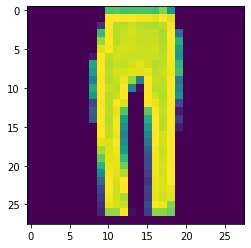

In [174]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(x_test_original[64])
plt.show()

###a) Using two convolutional layers explore the impact on different choices for the number of nodes and filter sizes for the two layers. Summarize your observations.


In [175]:
# Referred Tutorial 8

from tensorflow.keras.datasets import fashion_mnist
(x_train_original, y_train_original), (x_test_original, y_test_original) = fashion_mnist.load_data()

from tensorflow.keras.utils import to_categorical

y_train_original = to_categorical(y_train_original)
y_test_original = to_categorical(y_test_original)
y_train_original[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [176]:
# Building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Creating the model
model = Sequential()
# adding model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(x_train_original, y_train_original, validation_data=(x_test_original, y_test_original), epochs = 1)


In [180]:
#preds = model.predict(x_test_original[:4])
preds.argmax(axis = 1)

array([[19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 20, 20,
        20, 20, 20, 19, 20, 20, 20, 20, 20, 20, 20, 17],
       [ 0,  0,  0,  0, 18,  6,  3, 12,  5,  4,  4,  6,  7,  1,  1,  1,
        11,  6,  5, 12,  6, 13, 21, 11, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 25, 11,  3,  1,  1,  1,  6,  8,
         1, 26,  1,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  1, 26, 18,  1,  5,  8,
        20, 26,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0]])

In [181]:
y_test[:4]

array([0, 1, 1, 0])

Convolutions are used in image processing to blur and sharpen images but also to do other operations such as enhance edges and more on.  
And there are three types of layers in a convolutional neural network, such as convolutional layer, pooling layer and fully connected layer. Each of these layers has different parameters that can be optimized and performs a different task on the input data.
And the biggest advantage of utilizing CNN is little dependence on pre processing and it is easy to understand it and can be implemented fast.

###b) For the hyperparameters for the layers that you determined in part (a), experiment with a higher number of epochs. Summarize your observations.


In [182]:
# Referred Tutorial 8

from tensorflow.keras import layers

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


Hyperparameters are variables which determines the network structure and they determine how the network is trained. Hyperparameters are set before training and we should set the number of epochs as high as possible and terminate training based on the error rates.
An epoch is one learning cycle where the we see the whole training data set and if we have two batches, it needs to go through two iterations for one epoch.

## **3. Recurrent Neural Networks**

In this question you will experiment with a simple recurrent neural network, where you will try to model a sinusoidal function with noise, whose amplitude becomes larger and larger as the independent variable t increases (0 ≤ t ≤ N). This function can be expressed in Python as:

`x=(np.sin(0.02*t)+2*np.random.rand(N))*(t/N)`. 

For N=5000 we have:

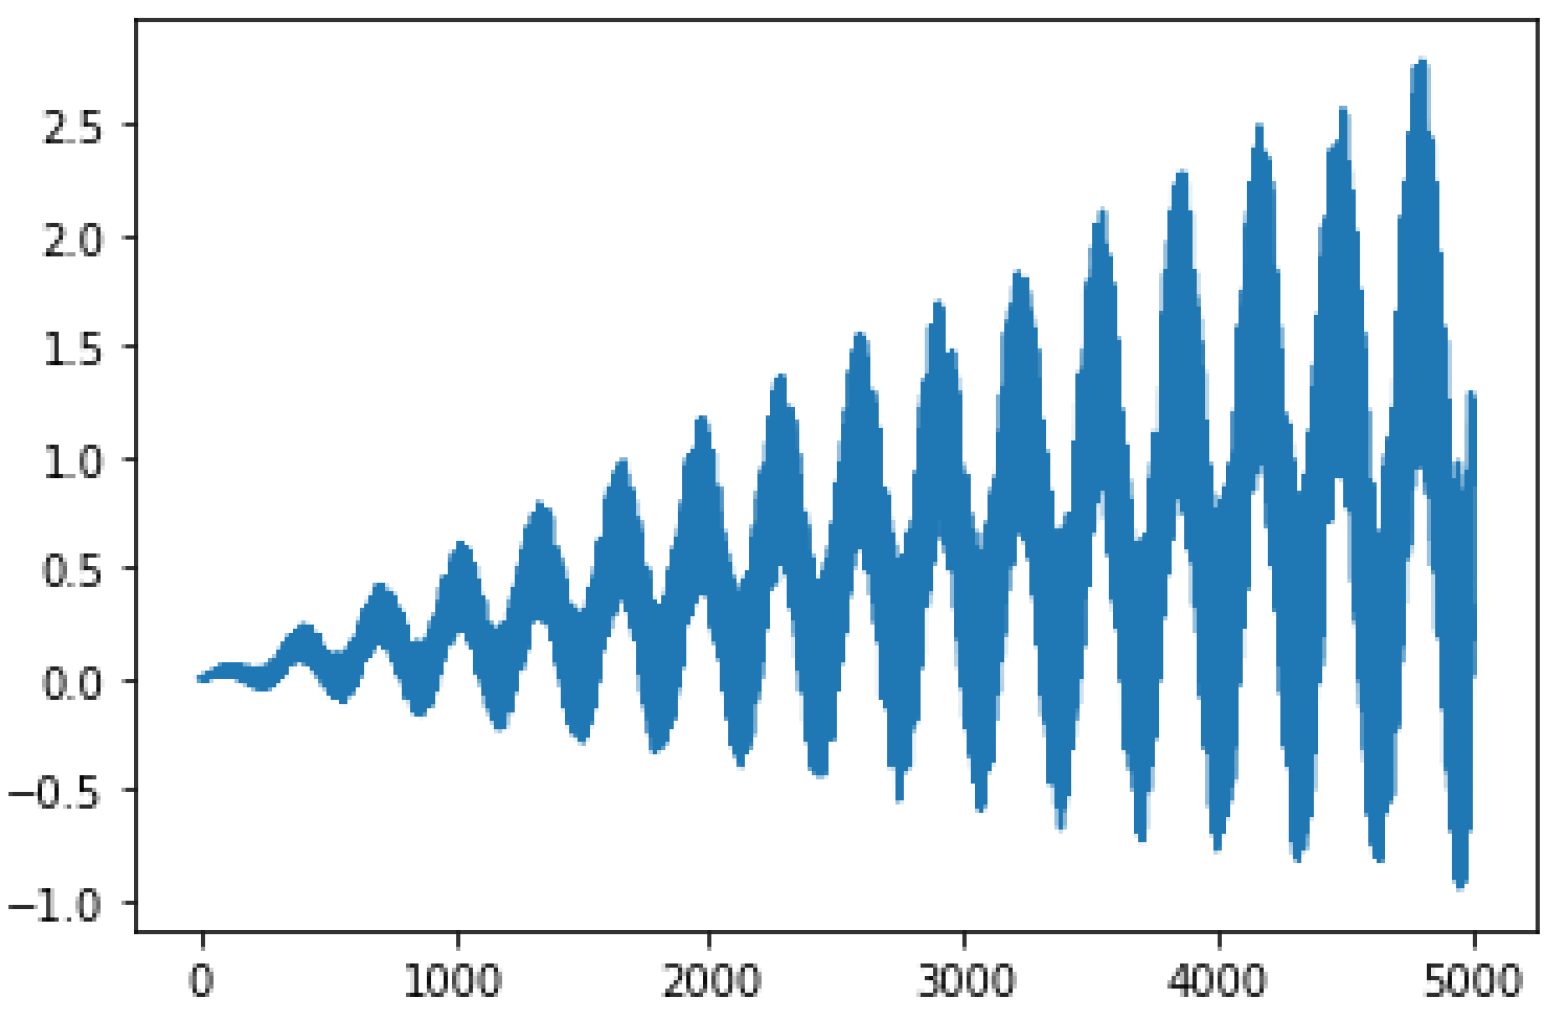

The idea is that you will train a recurrent neural network with points up to a certain value, Tp. This is all the training points will be t ≤ Tp . The length of the sequence provided to the network is a parameter that you can tune.



a) Complete the provided code to fulfill this task. You need to add at least one
simpleRNN layer and a proper output layer.
Compare the models with different numbers of RNN cells. [8, 16, 32, 64]

Choose the best number of internal nodes for this model.

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sourced from this question description, transform data into matrix form
def putAsMatrix(data, length):
 X, Y =[], []
 for i in range(len(data)-length):
  d=i+length  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

#get the data
length = 4
N = 5000    
Tp = 800    

t=np.arange(0,N)
x=(np.sin(0.02*t)+2*np.random.rand(N))*(t/N)
df = pd.DataFrame(x)
df.head()

,0
0,0.000000
1,0.000140
2,0.000707
3,0.001005
4,0.000250


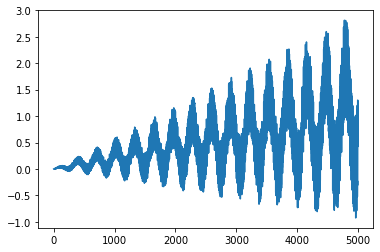

In [184]:
plt.plot(df)
plt.show()

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add length elements into train and test
test = np.append(test,np.repeat(test[-1,],length))
train = np.append(train,np.repeat(train[-1,],length))
 
trainX,trainY =putAsMatrix(train,length)
testX,testY =putAsMatrix(test,length)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [186]:
# Referred Tutorial 8

def simpleRNN(units): #units is the number of recurrent nodes in your NN
  model = Sequential()
  #Include here the specification of your network
  #**********************************************
  #model.add(...)
  model.add(SimpleRNN(units = 16, input_shape = (1, length), activation = 'relu'))
  model.add(Dense(1, activation ='sigmoid'))
  #**********************************************
  model.compile(loss='mean_squared_error', optimizer='rmsprop')
  model.summary()

  model.fit(trainX,trainY, epochs=50, batch_size=16)
  trainPredict = model.predict(trainX)
  testPredict= model.predict(testX)
  predicted=np.concatenate((trainPredict,testPredict),axis=0)

  scores = model.evaluate(testX, testY, verbose=0)
  print(scores)

  #the vertical red line shows the point where testing data starts
  index = df.index.values
  plt.plot(df)
  plt.plot(index,predicted)
  plt.axvline(df.index[Tp], c="r")
  plt.title(f'Simple RNN with {units} RNN units')
  plt.show()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, 16)                336       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 1ms/step - loss: 0.1648
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1170
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0767
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 7/50
50/50 [=========================

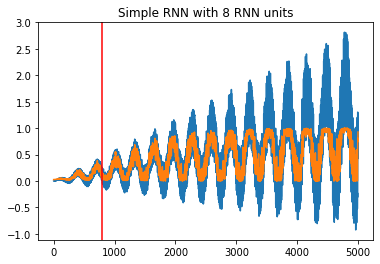

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_15 (SimpleRNN)    (None, 16)                336       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.1608
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1152
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0773
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0492
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0312
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0207
Epoch 7/50
50/50 [=========================

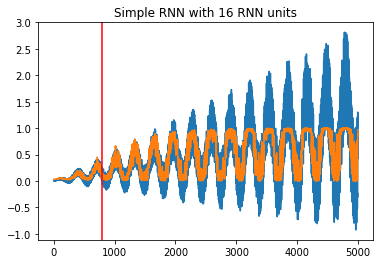

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_16 (SimpleRNN)    (None, 16)                336       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.1529
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 0.1068
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0706
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 7/50
50/50 [=========================

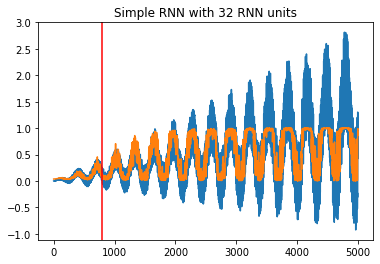

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_17 (SimpleRNN)    (None, 16)                336       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 1ms/step - loss: 0.1608
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 0.1127
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0718
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0433
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 7/50
50/50 [=========================

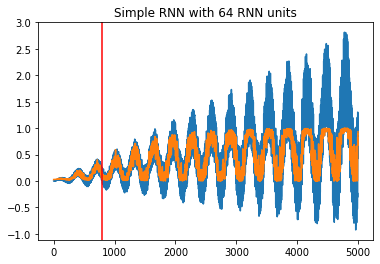

In [187]:
simpleRNN(8)
simpleRNN(16)
simpleRNN(32)
simpleRNN(64)

The best number of internal nodes for this model is 8.

b) Starting with length = 4, discuss how different choices of the length of the sequence fed
to the network can have an impact on performance.


In [188]:
# Referred Tutorial 8

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [189]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [190]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [49]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
391/391 [==============================] - 242s 613ms/step - loss: 0.5882 - accuracy: 0.6726 - val_loss: 0.4238 - val_accuracy: 0.8060


In [50]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.60%


The reason a fixed length is better because it improves performance by creating tensors of fixed shapes. But different length of the sequence fed
to the network can have an bad impact on the performance. 